#DISASTER TWEETS PRDEICTION USING NLP 

# SML PROJECT BY- 
#SOWMYA NEGI (E23CSEU1102)

#AARUSHI GOEL (E23CSEU1097)

#NANDINI JAISWAL (E23CSEU1083)



In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import warnings

warnings.filterwarnings('ignore')


C:\Users\imaar\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
train = pd.read_csv(r"C:\Users\imaar\Downloads\train.csv")
test = pd.read_csv(r"C:\Users\imaar\Downloads\Clean_Test_Data.csv")

train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
print("The dataset has {} rows and {} columns.".format(train.shape[0], train.shape[1]))

The dataset has 7613 rows and 5 columns.


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [5]:
# Check for missing values

train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [6]:
# Check for duplicates

train.duplicated().sum()

0

In [7]:
# Drop columns with more than 50% missing values

train.dropna(thresh=train.shape[0]*0.5, axis=1, inplace=True)

train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [8]:
# Impute missing values



for col in train.columns:

    if train[col].dtype == 'int64' or train[col].dtype == 'float64':

        train[col].fillna(train[col].mean(), inplace = True)



    else:

        train[col].fillna(train[col].mode()[0], inplace = True)



train.isna().any()

id          False
keyword     False
location    False
text        False
target      False
dtype: bool

In [9]:
# Check for unique values in each column

for col in train.columns:

    print(col)

    print(train[col].unique())



# Drop columns with only one unique value

for col in train.columns:

    if len(train[col].unique()) == 1:

        train.drop(col, axis=1, inplace=True)



train.shape

id
[    1     4     5 ... 10871 10872 10873]
keyword
['fatalities' 'ablaze' 'accident' 'aftershock' 'airplane%20accident'
 'ambulance' 'annihilated' 'annihilation' 'apocalypse' 'armageddon' 'army'
 'arson' 'arsonist' 'attack' 'attacked' 'avalanche' 'battle' 'bioterror'
 'bioterrorism' 'blaze' 'blazing' 'bleeding' 'blew%20up' 'blight'
 'blizzard' 'blood' 'bloody' 'blown%20up' 'body%20bag' 'body%20bagging'
 'body%20bags' 'bomb' 'bombed' 'bombing' 'bridge%20collapse'
 'buildings%20burning' 'buildings%20on%20fire' 'burned' 'burning'
 'burning%20buildings' 'bush%20fires' 'casualties' 'casualty'
 'catastrophe' 'catastrophic' 'chemical%20emergency' 'cliff%20fall'
 'collapse' 'collapsed' 'collide' 'collided' 'collision' 'crash' 'crashed'
 'crush' 'crushed' 'curfew' 'cyclone' 'damage' 'danger' 'dead' 'death'
 'deaths' 'debris' 'deluge' 'deluged' 'demolish' 'demolished' 'demolition'
 'derail' 'derailed' 'derailment' 'desolate' 'desolation' 'destroy'
 'destroyed' 'destruction' 'detonate' 'detonat

(7613, 5)

In [10]:
total_disaster_tweets = train['target'].sum()
print("Total number of disaster-related tweets:", total_disaster_tweets)

Total number of disaster-related tweets: 3271


In [11]:
train.head()

,id,keyword,location,text,target
0,1,fatalities,USA,Our Deeds are the Reason of this #earthquake M...,1
1,4,fatalities,USA,Forest fire near La Ronge Sask. Canada,1
2,5,fatalities,USA,All residents asked to 'shelter in place' are ...,1
3,6,fatalities,USA,"13,000 people receive #wildfires evacuation or...",1
4,7,fatalities,USA,Just got sent this photo from Ruby #Alaska as ...,1


In [12]:
#visualizing data

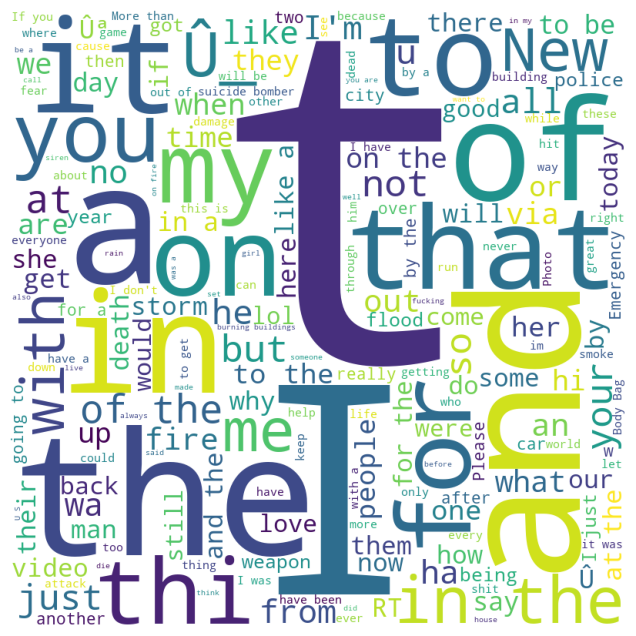

In [13]:
# Word cloud for the text column

from wordcloud import WordCloud



text = ' '.join(train['text'].values)

wordcloud = WordCloud(width = 800, height = 800, 

                background_color ='white', 

                stopwords = ['http', 'https', 'com', 'www', 'twitter', 'pic', 'ly', 'bit', 'status', 'amp', 'co', 'youtu', 'youtube', 'watch', 'v', 'html', 'org', 'net', 'en', 'wiki', 'index', 'php', 'title', 'wikipedia', 'wikimedia', 'commons', 'media', 'file', 'jpg', 'png', 'svg', 'gif', 'pdf', 'doc', 'docx', 'xls', 'xlsx', 'ppt', 'pptx', 'txt', 'csv', 'zip', 'tar', 'gz', '7z', 'rar'], 

                min_font_size = 10).generate(text)



plt.figure(figsize = (8, 8), facecolor = None)


# Remove the axis

plt.axis("off")

plt.imshow(wordcloud)

plt.show();


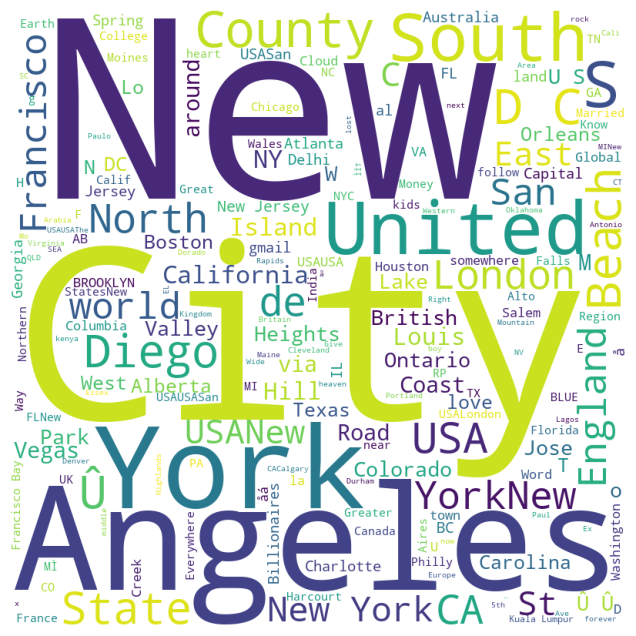

In [14]:
# Word cloud for location



text = ''.join(train['location'].values)

wordcloud = WordCloud(width = 800, height = 800, 

                background_color ='white', 

                stopwords = None, 

                min_font_size = 10).generate(text)



plt.figure(figsize = (8, 8), facecolor = None)



# Remove the axis

plt.axis("off")

plt.imshow(wordcloud)

plt.show();

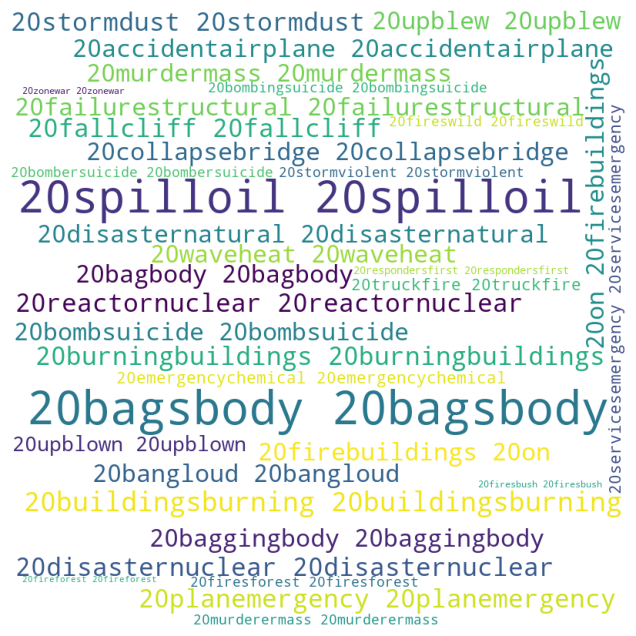

In [15]:
# Word cloud for keywords



text = ''.join(train['keyword'].values)

wordcloud = WordCloud(width = 800, height = 800, 

                background_color ='white', 

                stopwords = None, 

                min_font_size = 10).generate(text)



plt.figure(figsize = (8, 8), facecolor = None)



# Remove the axis

plt.axis("off")

plt.imshow(wordcloud)

plt.show();

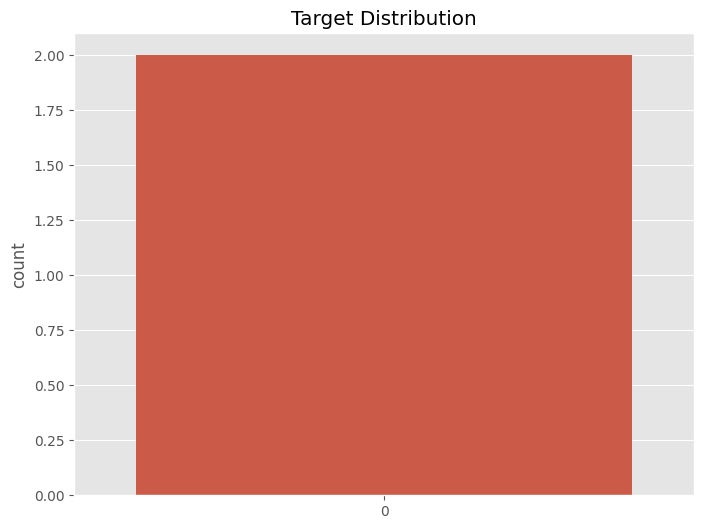

In [16]:
# Distribution of target variable

plt.style.use('ggplot')

plt.figure(figsize=(8, 6))

sns.countplot(train['target'].value_counts(normalize=True))

plt.title('Target Distribution')

plt.show();


In [17]:
#sentiment analysis

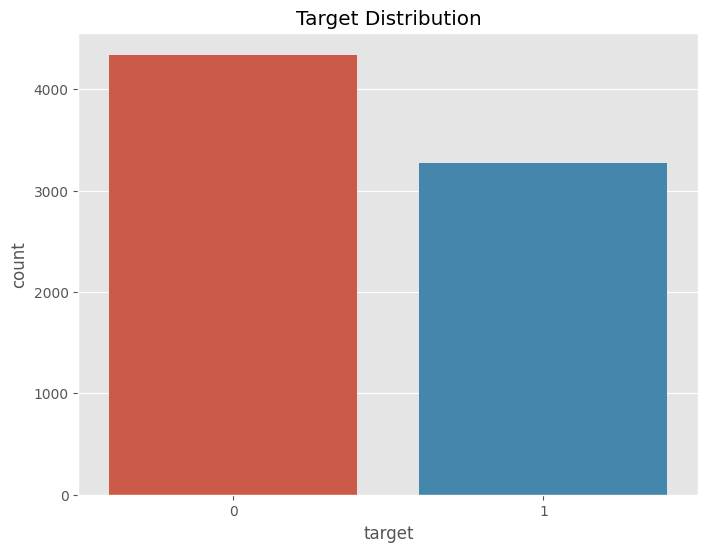

In [18]:
# Corrected Code to Plot the Target Distribution
plt.style.use('ggplot')
plt.figure(figsize=(8, 6))
sns.countplot(data=train, x='target')
plt.title('Target Distribution')
plt.show()

In [19]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [20]:
# We are going to carry out a sentiment analysis on the text column to see which tweets are positive, negative or neutral



from textblob import TextBlob



def get_sentiment(text):

    analysis = TextBlob(text)

    if analysis.sentiment.polarity > 0:

        return 'positive'

    elif analysis.sentiment.polarity == 0:

        return 'neutral'

    else:

        return 'negative'

    

train['sentiment'] = train['text'].apply(get_sentiment)

train.head()


,id,keyword,location,text,target,sentiment
0,1,fatalities,USA,Our Deeds are the Reason of this #earthquake M...,1,neutral
1,4,fatalities,USA,Forest fire near La Ronge Sask. Canada,1,positive
2,5,fatalities,USA,All residents asked to 'shelter in place' are ...,1,negative
3,6,fatalities,USA,"13,000 people receive #wildfires evacuation or...",1,neutral
4,7,fatalities,USA,Just got sent this photo from Ruby #Alaska as ...,1,neutral


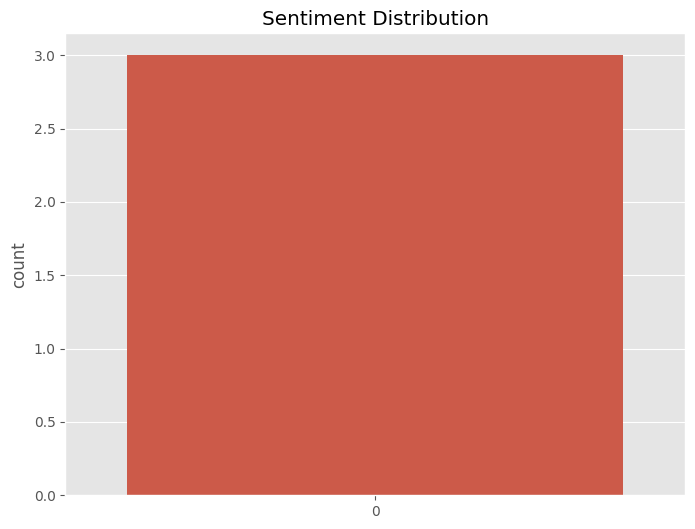

In [21]:
plt.style.use('ggplot')

plt.figure(figsize=(8, 6))

sns.countplot(train['sentiment'].value_counts())

plt.title('Sentiment Distribution')

plt.show();

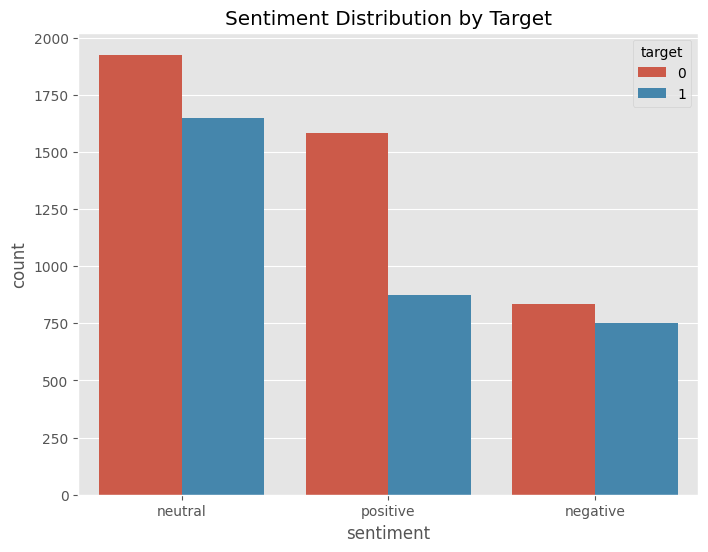

In [22]:
# Distribution of sentiment by target

plt.style.use('ggplot')

plt.figure(figsize=(8, 6))

sns.countplot(x='sentiment', hue='target', data=train)  # Ensure the data parameter is set

plt.title('Sentiment Distribution by Target')

plt.show();

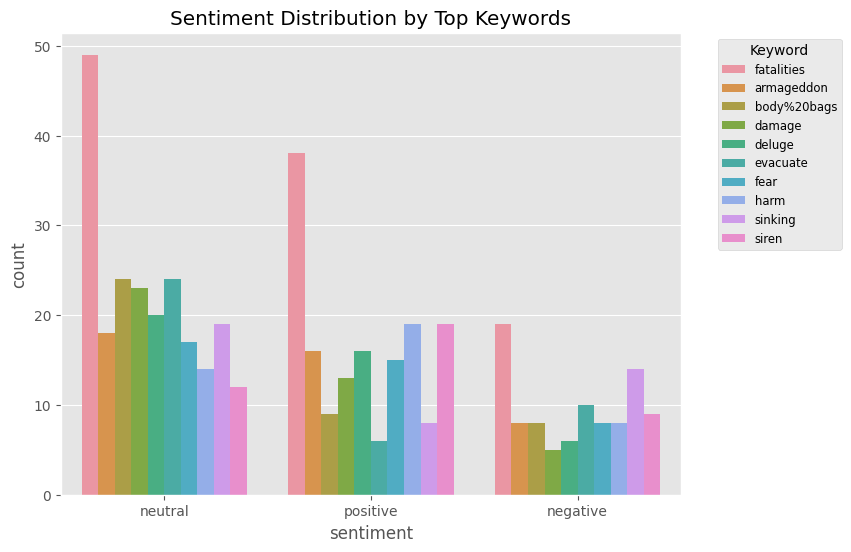

In [23]:
# Sentiment distribution by keyword

top_keywords = train['keyword'].value_counts().nlargest(10).index

filtered_train = train[train['keyword'].isin(top_keywords)]



plt.figure(figsize=(8, 6))

sns.countplot(x='sentiment', hue='keyword', data=filtered_train)

plt.title('Sentiment Distribution by Top Keywords')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', title='Keyword', title_fontsize='medium')

plt.show()

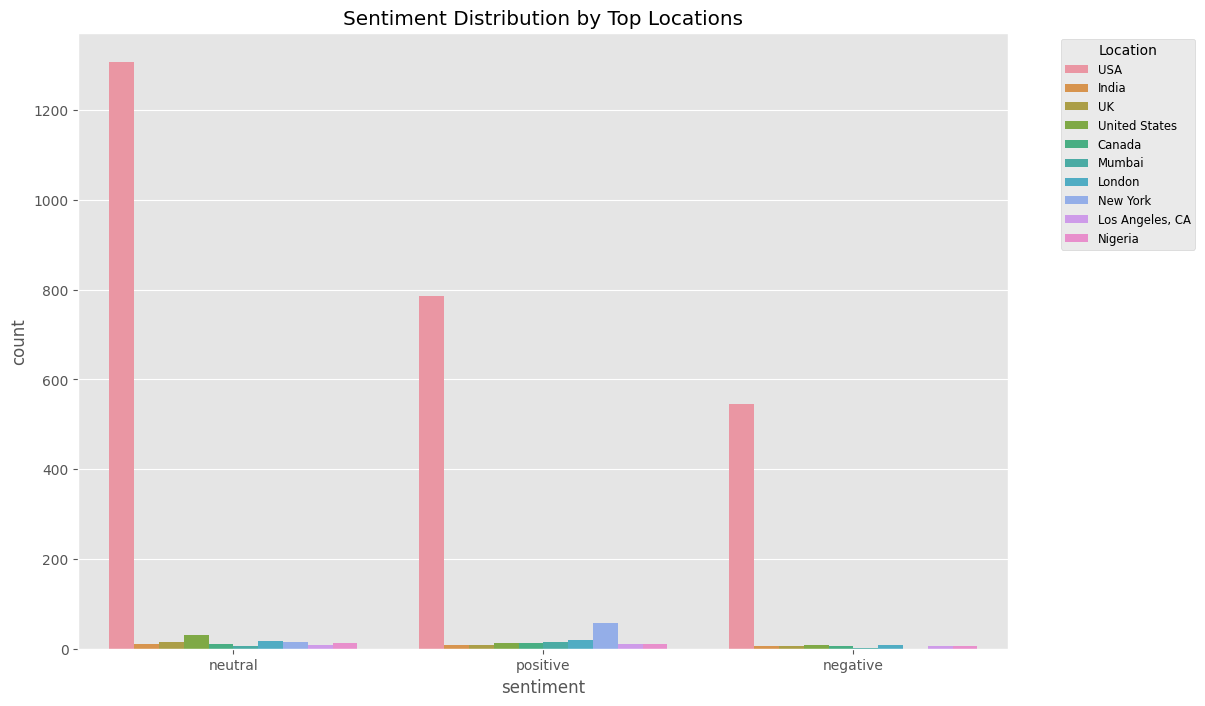

In [24]:
# Sentiment distribution by location

top_locations = train['location'].value_counts().nlargest(10).index

filtered_train = train[train['location'].isin(top_locations)]



plt.figure(figsize=(12, 8))

sns.countplot(x='sentiment', hue='location', data=filtered_train)

plt.title('Sentiment Distribution by Top Locations')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', title='Location', title_fontsize='medium')

plt.show();


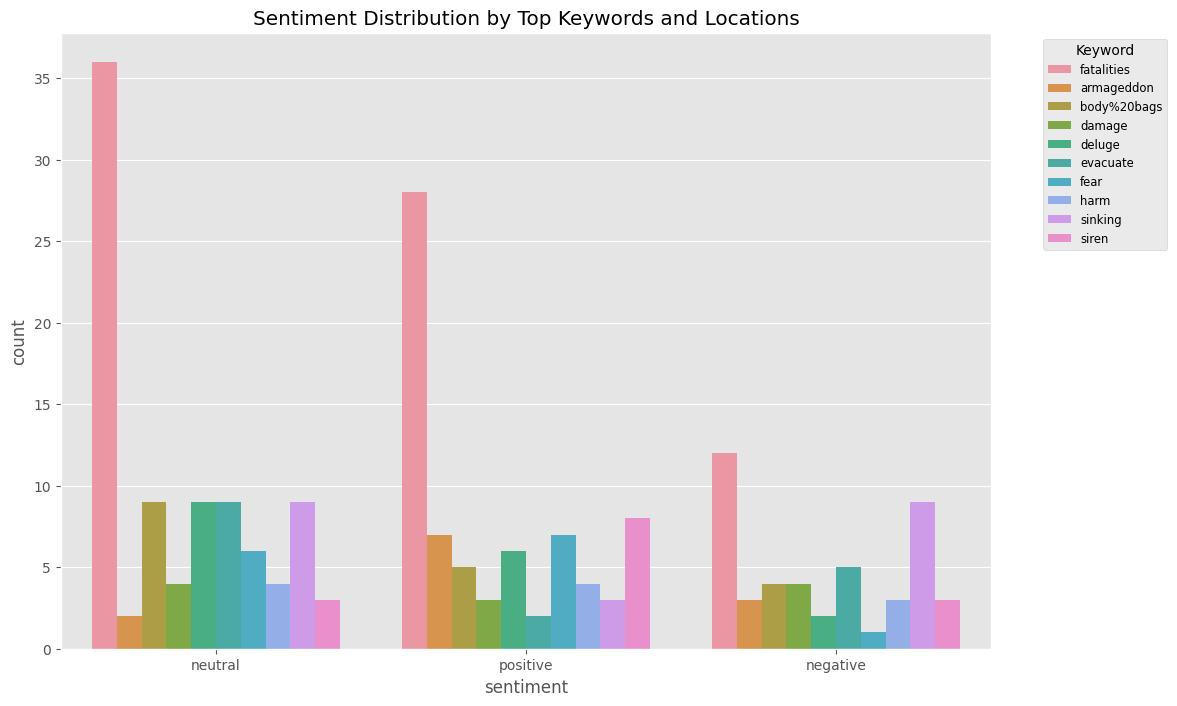

In [25]:
# Sentiment distribution by keyword and location



top_keywords = train['keyword'].value_counts().nlargest(10).index

top_locations = train['location'].value_counts().nlargest(10).index



filtered_train = train[(train['keyword'].isin(top_keywords)) & (train['location'].isin(top_locations))]

plt.figure(figsize=(12, 8))

sns.countplot(x='sentiment', hue='keyword', data=filtered_train)

plt.title('Sentiment Distribution by Top Keywords and Locations')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', title='Keyword', title_fontsize='medium')

plt.show();

In [26]:
#model building

In [27]:
X = train.drop(['id', 'target', 'sentiment'], axis=1) # we remove sentiment column because it is not a feature. It was created for analysis hence useless as a feature.

y = train['target']





from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report



text_transformer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)
preprocessor = ColumnTransformer(transformers=[('text', text_transformer, 'text')])

lr = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression())])



lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)



print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 80.24%

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       874
           1       0.82      0.69      0.75       649

    accuracy                           0.80      1523
   macro avg       0.81      0.79      0.79      1523
weighted avg       0.80      0.80      0.80      1523



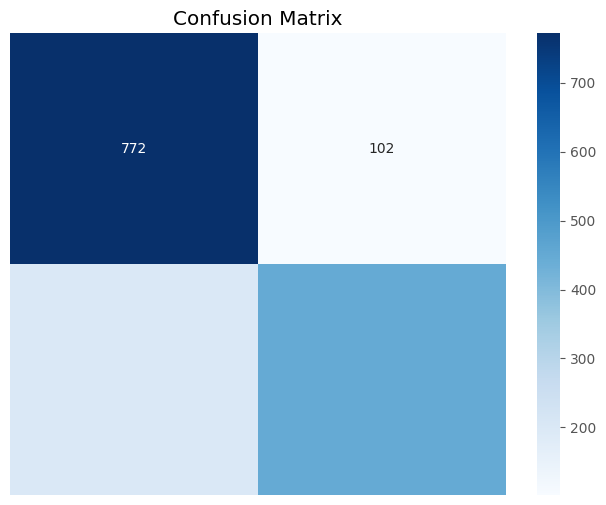

In [28]:
# Confusion matrix

# We will use a heatmap



cm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

plt.figure(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')

# Remove the axis

plt.axis("off")

plt.show();

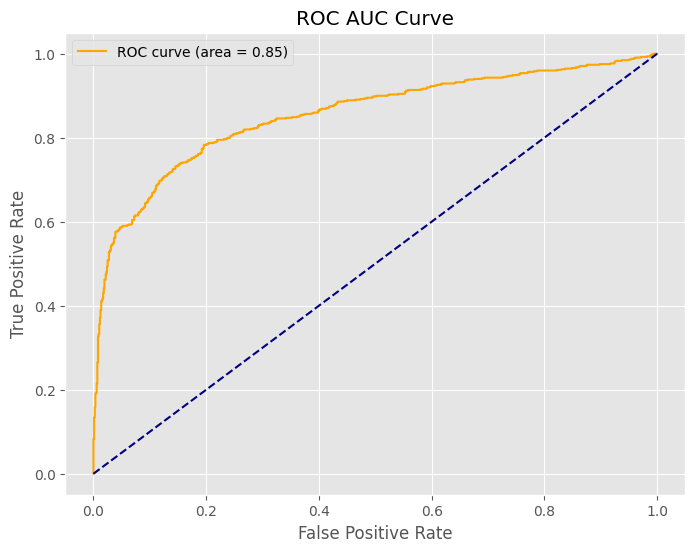

In [29]:
# ROC AUC curve

from sklearn.metrics import roc_auc_score, roc_curve
y_pred_proba = lr.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)


plt.figure(figsize=(8, 6))

plt.plot(fpr, tpr, color='orange', label='ROC curve (area = {:.2f})'.format(roc_auc_score(y_test, y_pred_proba)))

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('ROC AUC Curve')

plt.legend()

plt.show();

In [30]:
!pip install nlpaug


In [31]:
# 1. Data augmentation

# We will use the nlpaug library to augment the text data. We will use the WordNet synonym technique to replace words in the text data.
import nlpaug.augmenter.word as naw
#!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/ --n


aug = naw.SynonymAug(aug_src='wordnet')



# Augment the text data

augmented_text = []

for text in X['text']:

    augmented_words = aug.augment(text)  # Get augmented words

    augmented_text.append(' '.join(augmented_words))  # Join them back into a single string



# Create a new dataframe with the augmented text data

augmented_df = X.copy()

augmented_df['text'] = augmented_text

# Split the data

X_train, X_test, y_train, y_test = train_test_split(augmented_df, y, test_size=0.2, random_state=42)



# Fit the model

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)



print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 76.56%

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.86      0.81       874
           1       0.77      0.64      0.70       649

    accuracy                           0.77      1523
   macro avg       0.77      0.75      0.75      1523
weighted avg       0.77      0.77      0.76      1523



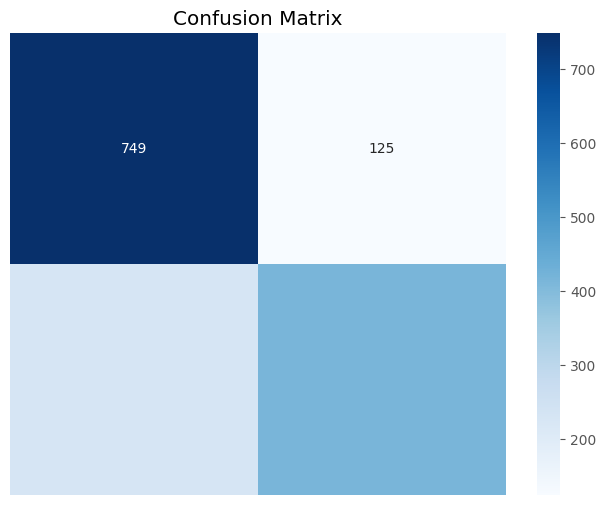

In [32]:
# Confusion matrix

cm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

plt.figure(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')

# Remove the axis

plt.axis("off")

plt.show();


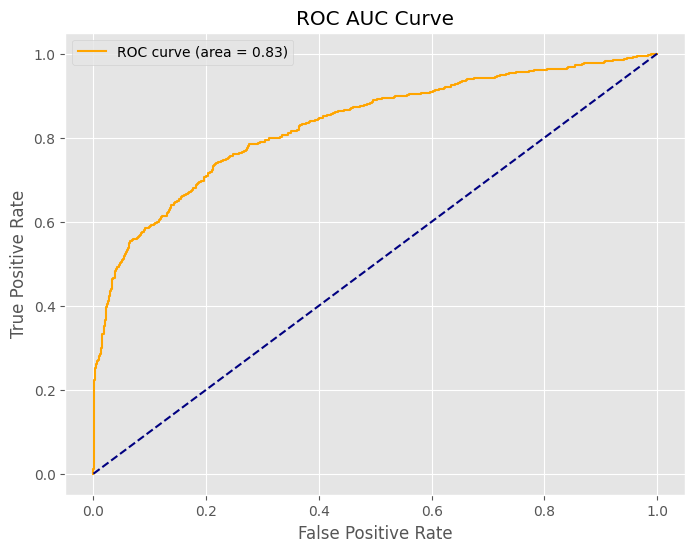

In [33]:
# ROC AUC curve

y_pred_proba = lr.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)



plt.figure(figsize=(8, 6))

plt.plot(fpr, tpr, color='orange', label='ROC curve (area = {:.2f})'.format(roc_auc_score(y_test, y_pred_proba)))

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('ROC AUC Curve')

plt.legend()

plt.show();

Best Parameters: {'classifier__C': 1, 'preprocessor__text__max_features': 5000, 'preprocessor__text__ngram_range': (1, 1)}
Best Score: 0.7699507389162562
Best Estimator: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('text',
                                                  TfidfVectorizer(max_features=5000),
                                                  'text')])),
                ('classifier', LogisticRegression(C=1))])
Accuracy: 77.22%

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.86      0.81       874
           1       0.77      0.66      0.71       649

    accuracy                           0.77      1523
   macro avg       0.77      0.76      0.76      1523
weighted avg       0.77      0.77      0.77      1523



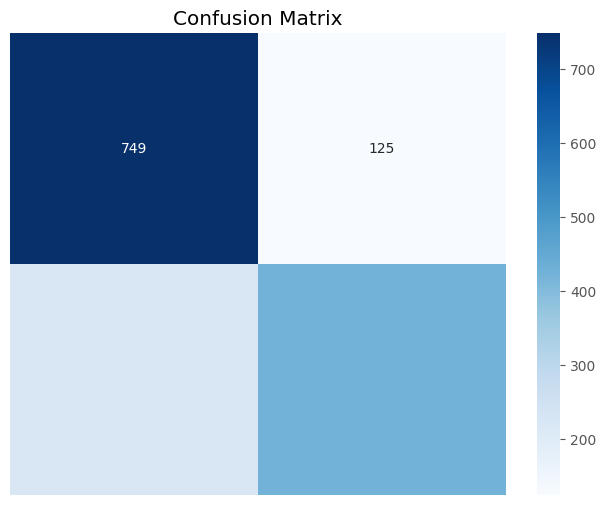

In [34]:
# 2. Hyperparameter tuning

from sklearn.model_selection import GridSearchCV



param_grid = {

    'preprocessor__text__ngram_range': [(1, 1), (1, 2), (2, 2)],

    'preprocessor__text__max_features': [1000, 5000, 10000],

    'classifier__C': [0.01, 0.1, 1, 10, 100]

}



grid_search = GridSearchCV(lr, param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)



print("Best Parameters:", grid_search.best_params_)

print("Best Score:", grid_search.best_score_)

print("Best Estimator:", grid_search.best_estimator_)

y_pred = grid_search.predict(X_test)



print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))

print("\nClassification Report:\n", classification_report(y_test, y_pred))



# Confusion matrix

cm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

plt.figure(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')

# Remove the axis

plt.axis("off")

plt.show();



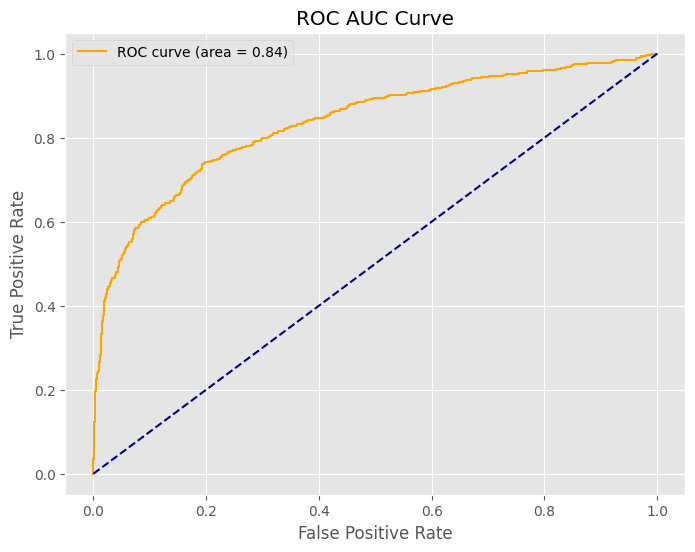

In [35]:
# ROC AUC curve

y_pred_proba = grid_search.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)



plt.figure(figsize=(8, 6))

plt.plot(fpr, tpr, color='orange', label='ROC curve (area = {:.2f})'.format(roc_auc_score(y_test, y_pred_proba)))

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('ROC AUC Curve')

plt.legend()

plt.show();


Accuracy: 73.21%

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.86      0.79       874
           1       0.75      0.56      0.64       649

    accuracy                           0.73      1523
   macro avg       0.74      0.71      0.71      1523
weighted avg       0.73      0.73      0.72      1523



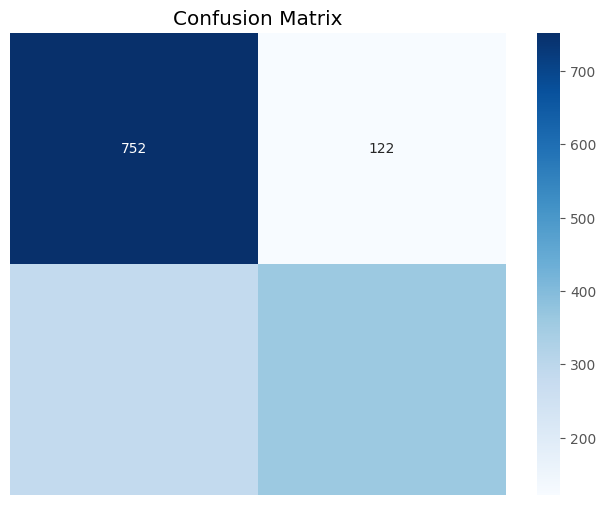

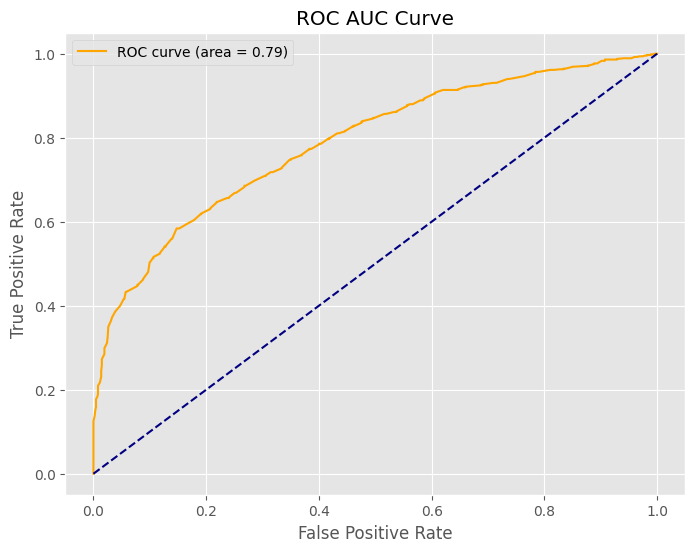

In [36]:
# 3. Ensemble methods

from sklearn.ensemble import RandomForestClassifier



model = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', RandomForestClassifier())])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)



print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))

print("\nClassification Report:\n", classification_report(y_test, y_pred))



# Confusion matrix

cm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')

# Remove the axis

plt.axis("off")

plt.show();



# ROC AUC curve

y_pred_proba = model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)



plt.figure(figsize=(8, 6))

plt.plot(fpr, tpr, color='orange', label='ROC curve (area = {:.2f})'.format(roc_auc_score(y_test, y_pred_proba)))

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('ROC AUC Curve')

plt.legend()

plt.show();

Best Parameters: {'classifier__max_depth': 50, 'classifier__n_estimators': 100, 'preprocessor__text__max_features': 10000, 'preprocessor__text__ngram_range': (1, 1)}
Best Score: 0.732512315270936
Best Estimator: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('text',
                                                  TfidfVectorizer(max_features=10000),
                                                  'text')])),
                ('classifier', RandomForestClassifier(max_depth=50))])
Accuracy: 74.46%

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.91      0.80       874
           1       0.81      0.52      0.64       649

    accuracy                           0.74      1523
   macro avg       0.77      0.72      0.72      1523
weighted avg       0.76      0.74      0.73      1523



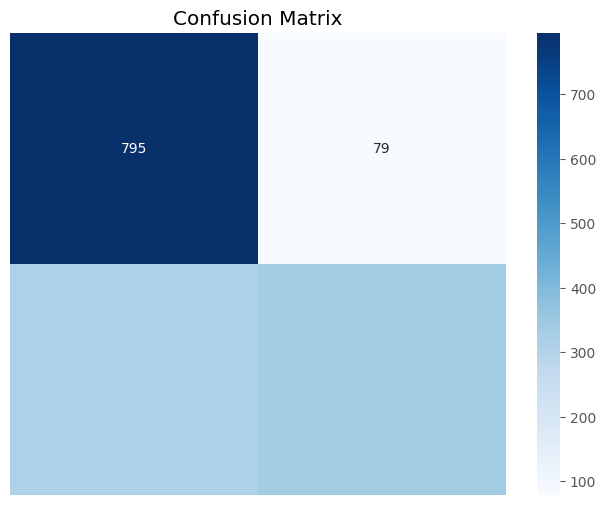

In [37]:
# Hyperameter tuning our Random Forest model

param_grid = {

    'preprocessor__text__ngram_range': [(1, 1), (1, 2), (2, 2)],

    'preprocessor__text__max_features': [1000, 5000, 10000],

    'classifier__n_estimators': [100, 200, 300],

    'classifier__max_depth': [10, 20, 30, 40, 50]

}



grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)



print("Best Parameters:", grid_search.best_params_)

print("Best Score:", grid_search.best_score_)

print("Best Estimator:", grid_search.best_estimator_)

y_pred = grid_search.predict(X_test)


print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))

print("\nClassification Report:\n", classification_report(y_test, y_pred))



# Confusion matrix

cm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

plt.figure(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')

# Remove the axis

plt.axis("off")

plt.show();

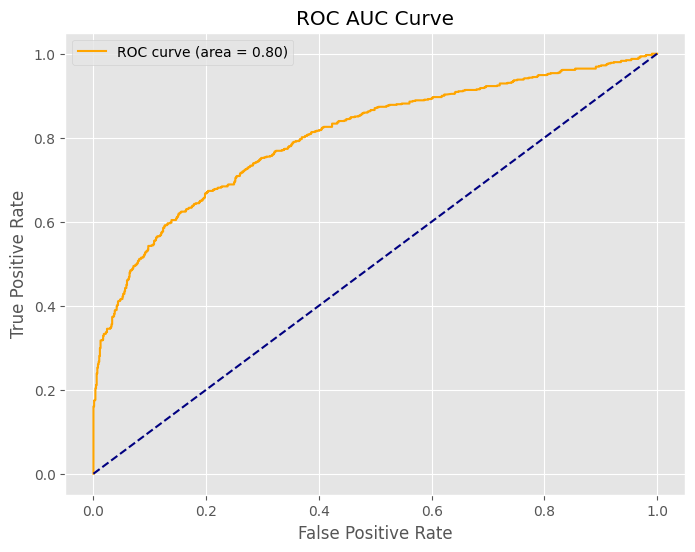

In [38]:
y_pred_proba = grid_search.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)



plt.figure(figsize=(8, 6))

plt.plot(fpr, tpr, color='orange', label='ROC curve (area = {:.2f})'.format(roc_auc_score(y_test, y_pred_proba)))

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('ROC AUC Curve')

plt.legend()

plt.show();

Accuracy: 72.88%

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.86      0.78       874
           1       0.75      0.55      0.63       649

    accuracy                           0.73      1523
   macro avg       0.73      0.71      0.71      1523
weighted avg       0.73      0.73      0.72      1523



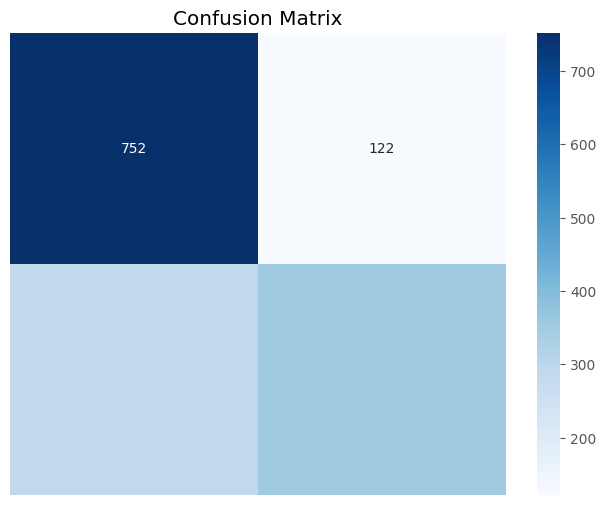

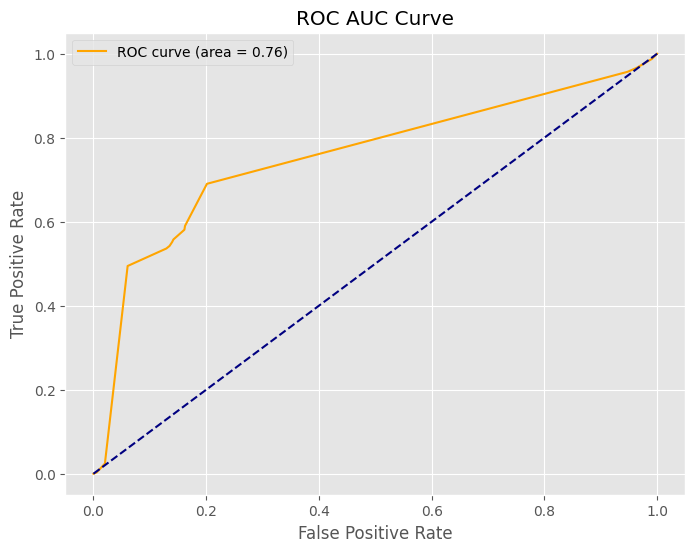

In [39]:
# 4. Stacking

# Before we stack our models, we need to create a new dataset with the predictions of the models as features.

from sklearn.ensemble import StackingClassifier

from sklearn.svm import SVC

from sklearn.naive_bayes import MultinomialNB



# Create a new dataset with the predictions of the models as features

X_train_stack = pd.DataFrame()

X_test_stack = pd.DataFrame()



# Logistic Regression

model = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression())])

model.fit(X_train, y_train)

X_train_stack['logistic_regression'] = model.predict(X_train)

X_test_stack['logistic_regression'] = model.predict(X_test)



# Random Forest

model = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', RandomForestClassifier())])

model.fit(X_train, y_train)

X_train_stack['random_forest'] = model.predict(X_train)

X_test_stack['random_forest'] = model.predict(X_test)



# Support Vector Machine

model = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', SVC(probability=True))])

model.fit(X_train, y_train)

X_train_stack['svm'] = model.predict(X_train)

X_test_stack['svm'] = model.predict(X_test)



# Naive Bayes
model = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', MultinomialNB())])

model.fit(X_train, y_train)

X_train_stack['naive_bayes'] = model.predict(X_train)

X_test_stack['naive_bayes'] = model.predict(X_test)



# Fit the stacking model

model = StackingClassifier(estimators=[

    ('logistic_regression', LogisticRegression()),

    ('random_forest', RandomForestClassifier()),

    ('svm', SVC(probability=True)),

    ('naive_bayes', MultinomialNB())

], final_estimator=LogisticRegression())



model.fit(X_train_stack, y_train)

y_pred = model.predict(X_test_stack)



print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))

print("\nClassification Report:\n", classification_report(y_test, y_pred))



# Confusion matrix

cm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

plt.figure(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')

# Remove the axis

plt.axis("off")

plt.show();



y_pred_proba = model.predict_proba(X_test_stack)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)



plt.figure(figsize=(8, 6))

plt.plot(fpr, tpr, color='orange', label='ROC curve (area = {:.2f})'.format(roc_auc_score(y_test, y_pred_proba)))

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('ROC AUC Curve')

plt.legend()

plt.show();

In [40]:
!pip install xgboost


Accuracy: 75.25%

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.88      0.80       874
           1       0.78      0.58      0.67       649

    accuracy                           0.75      1523
   macro avg       0.76      0.73      0.73      1523
weighted avg       0.76      0.75      0.74      1523



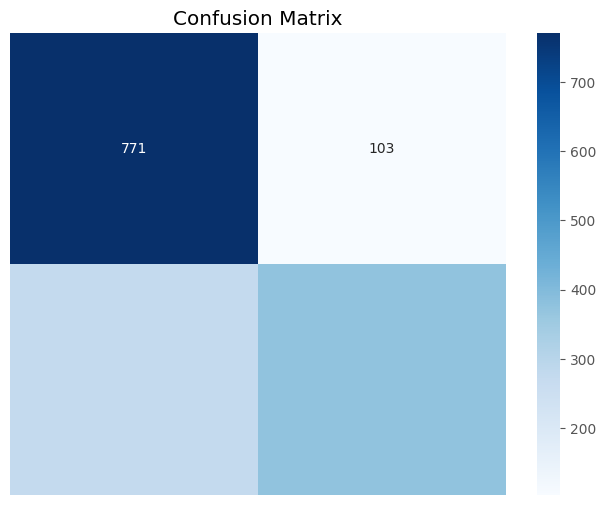

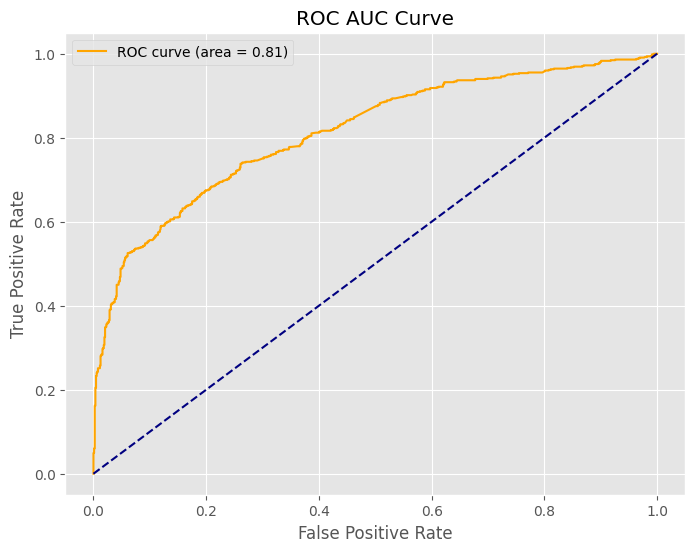

In [41]:
# XGBClassifier

from xgboost import XGBClassifier



xgb = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', XGBClassifier())])

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)



print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))

print("\nClassification Report:\n", classification_report(y_test, y_pred))



# Confusion matrix

cm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

plt.figure(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')

# Remove the axis

plt.axis("off")

plt.show();



# ROC AUC curve

y_pred_proba = xgb.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)



plt.figure(figsize=(8, 6))

plt.plot(fpr, tpr, color='orange', label='ROC curve (area = {:.2f})'.format(roc_auc_score(y_test, y_pred_proba)))

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('ROC AUC Curve')

plt.legend()

plt.show();

